# Clean and Analyze Employee Exit Surveys

Trying to answer the questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [38]:
import pandas as pd
import numpy as np

In [39]:
dete_survey = pd.read_csv('dete_survey.csv')
print(dete_survey.head(5))
print(dete_survey.info())
tafe_survey = pd.read_csv('tafe_survey.csv')
print(tafe_survey.head())
print(tafe_survey.info())

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Cent

- dete_survey contians values that are 'Not Stated' and therefore are missing
- both data sets include the same columns with different names
- multiple columns state employee resigned because they were dissatisfied

Change import of csv to one that creates NaN for not filled spaces

In [40]:
dete_survey =  pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

Drop columns that are unnecessary for analysis

In [41]:
dete_survey_updated = dete_survey.drop(
    dete_survey.columns[28:49],axis=1)
tafe_survey_updated = tafe_survey.drop(
    tafe_survey.columns[17:66],axis=1)

Rename columns so that they are the same for the two surveys

In [42]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [43]:
tafe_survey_updated = tafe_survey_updated.rename(columns = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In order to identify reasons for resignation, each resignation in the surveys has to be extracted.

In [44]:
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


dete_survey_updated has three resignation reasons and tafe_survey_updated only has one. Each need to be isolated.

In [45]:
dete_resignations = dete_survey_updated[
    dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [46]:
tafe_resignations = tafe_survey_updated[
    tafe_survey_updated['separationtype'].str.contains('Resignation', na = False)].copy()
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Cleaning Resignation Data

- Make sure all resignation dates are after start date
- Make sure all resignation dates are before current date
- Make sure start dates are not unreasonable

In [47]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [48]:
year = r"([2][0][0-1][0-9])"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(year).astype('float')
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [49]:
print(dete_resignations['cease_date'].value_counts().sort_index())
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=False))

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64
2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64


Most people resigned in 2012 and 2013 for dete and 2011 and 2012 for tafe.

In [81]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']

Added institute service column to dete so that dataframes match more closely

## Identifying Dissatisfied Employees

tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

In order for 

dete_survey_updated:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

In [82]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [182]:
def update_vals(val):
    if val == '-':
        return False
    elif (pd.isnull(val)):
        return np.nan
    else:
        return True
dissatisfaction = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
tafe_resignations[dissatisfaction] = tafe_resignations[dissatisfaction].applymap(update_vals)

In [183]:
tafe_resignations['dissatisfied'] = tafe_resignations[dissatisfaction].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'].value_counts()

True    332
Name: dissatisfied, dtype: int64

In [184]:
diss_dete = ['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']
dete_resignations['dissatisfied'] = dete_resignations[diss_dete].any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [86]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

## Combining Dataframes

In [87]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [88]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up])
combined_updated = combined.dropna(axis=1,thresh=500)

Created columns with distinct values for each institute so that when table is pivoted, data still is labeled. Dropped any columns with fewer than 500 non-null values.

### Finish Cleaning Data

Change institute service to ranges:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [197]:
combined_updated_c = combined_updated.copy()
combined_updated_c['institute_service'] = combined_updated['institute_service'].astype('str')

In [198]:
combined_updated_c.dtypes

id                   float64
separationtype        object
cease_date           float64
position              object
employment_status     object
gender                object
age                   object
institute_service     object
dissatisfied            bool
institute             object
service_cat           object
dtype: object

In [199]:
print(combined_updated_c['institute_service'].value_counts())

0.0      93
nan      88
4.0      79
2.0      78
6.0      50
10.0     27
120.0    26
5.0      23
1.0      22
3.0      20
20.0     17
9.0      14
7.0      13
8.0       8
13.0      8
15.0      7
14.0      6
22.0      6
17.0      6
12.0      6
18.0      5
16.0      5
24.0      4
23.0      4
11.0      4
39.0      3
19.0      3
21.0      3
32.0      3
30.0      2
28.0      2
36.0      2
25.0      2
26.0      2
38.0      1
33.0      1
34.0      1
27.0      1
35.0      1
41.0      1
49.0      1
42.0      1
29.0      1
31.0      1
Name: institute_service, dtype: int64


In [200]:
years_service['years'] = combined_updated_c[
    'institute_service'].str.replace(
    'Less than 1 year','0').str.replace(
    'More than 20 years','20').str.replace(r'[0-9]\-','').astype(float)
print(years_service['years'])
combined_updated_c['institute_service'] = years_service['years']
print(combined_updated_c['institute_service'])

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
696     6.0
697     2.0
698     NaN
699     6.0
701     4.0
Name: years, Length: 651, dtype: float64
3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
696     6.0
697     2.0
698     NaN
699     6.0
701     4.0
Name: institute_service, Length: 651, dtype: float64


In [204]:
def career_stage(val):
    if val < 3:
        return 'New'
    elif val>=3 and val <=6:
        return 'Experienced'
    elif val >6 and val <11:
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    else:
        return 'NaN'


combined_updated_c['service_cat'] = combined_updated_c['institute_service'].apply(career_stage)
print(combined_updated_c["service_cat"].value_counts(dropna=False))


New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64


In [162]:
combined_updated_c["dissatisfied"].value_counts(dropna=False)

True     481
False    162
NaN        8
Name: dissatisfied, dtype: int64

In [205]:
combined_updated_c["dissatisfied"] = combined_updated_c["dissatisfied"].fillna(True)
combined_updated_c["dissatisfied"].value_counts(dropna=False)

True     489
False    162
Name: dissatisfied, dtype: int64

In [206]:
dissatisfied_employees = combined_updated_c.pivot_table(values='dissatisfied', index = 'service_cat')
dissatisfied_employees

,dissatisfied
service_cat,
Established,0.741935
Experienced,0.761628
NaN,0.704545
New,0.818653
Veteran,0.676471


In [207]:
import matplotlib.pyplot as plt
%matplotlib inline

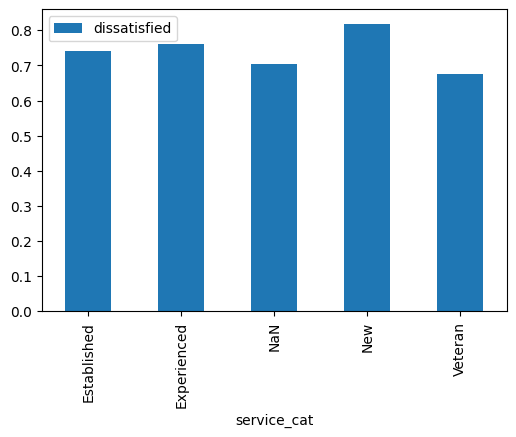

In [208]:
dissatisfied_employees.plot(kind = 'bar')

Most people were dissatisfied when resigning. Veternas were least dissatisfied and New workers were most dissatisfied.